### DATA SCIENCE CAPSTONE PROJECT

#### COLLECTING DATA

In [51]:
import pandas as pd
import numpy as np
import requests
import datetime

In [57]:
url='https://api.spacexdata.com/v4/launches/past' # we are targeting a specific endpoint of the API to get past launch data

response = requests.get(url)
response.json() # response is in the form of JSON Object
data = pd.json_normalize(response.json()) # converts JASON object into a table
print(response.status_code)
data.head()

200


,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [59]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [61]:
data.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight':...",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight':...",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight':...",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight':...",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight':...",6,2010-06-04T18:45:00.000Z,2010-06-04


In [77]:
data.isnull().sum()

rocket           0
payloads         0
launchpad        0
cores            0
flight_number    0
date_utc         0
date             0
dtype: int64

In [79]:
!pip3 install beautifulsoup4
!pip3 install requests

In [81]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [83]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [91]:
response = requests.get(static_url)

In [93]:
import requests
from bs4 import BeautifulSoup

In [99]:
# Create a BeautifulSoup object using the response text
soup = BeautifulSoup(response.text, 'html.parser')

In [101]:
# Use soup.title attribute
print(soup.title)
print(soup.title.text)

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>
List of Falcon 9 and Falcon Heavy launches - Wikipedia


In [103]:
# Find all <table> elements and assign to html_tables
html_tables = soup.find_all('table')

# Print number of tables found
print(f"Number of tables found: {len(html_tables)}")

Number of tables found: 25


In [111]:
# Let's print the third table and check its content
first_launch_table = html_tables[2]
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

In [117]:
for i, table in enumerate(html_tables):
    ths = table.find_all('th')
    print(f"Table {i} has {len(ths)} <th> elements.")

Table 0 has 0 <th> elements.
Table 1 has 0 <th> elements.
Table 2 has 17 <th> elements.
Table 3 has 16 <th> elements.
Table 4 has 17 <th> elements.
Table 5 has 19 <th> elements.
Table 6 has 28 <th> elements.
Table 7 has 31 <th> elements.
Table 8 has 23 <th> elements.
Table 9 has 36 <th> elements.
Table 10 has 28 <th> elements.
Table 11 has 6 <th> elements.
Table 12 has 6 <th> elements.
Table 13 has 6 <th> elements.
Table 14 has 6 <th> elements.
Table 15 has 19 <th> elements.
Table 16 has 10 <th> elements.
Table 17 has 2 <th> elements.
Table 18 has 3 <th> elements.
Table 19 has 22 <th> elements.
Table 20 has 4 <th> elements.
Table 21 has 2 <th> elements.
Table 22 has 2 <th> elements.
Table 23 has 18 <th> elements.
Table 24 has 8 <th> elements.


In [119]:
first_launch_table = html_tables[3]  # or whatever index you found

# Extract <th> elements again
th_elements = first_launch_table.find_all('th')

# Continue as before
column_names = []

for th in th_elements:
    name = extract_column_from_header(th)
    if name is not None and len(name) > 0:
        column_names.append(name)

print("Extracted column names:")
print(column_names)

Extracted column names:
['Flight No.', 'Date andtime (UTC)', 'Version,Booster[b]', 'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer', 'Launchoutcome', 'Boosterlanding', '8', '9', '10', '11', '12', '13']


In [125]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [129]:
# Identify and calculate the percentage of the missing values in each attribute

df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [131]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [133]:
# Apply value_counts() on column LaunchSite
launch_counts = df['LaunchSite'].value_counts()
print(launch_counts)

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


In [135]:
# Apply value_counts on Orbit 

orbit_counts = df['Orbit'].value_counts()
print(orbit_counts)

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64


In [137]:
# landing_outcomes = values on Outcome column

landing_outcomes = df['Outcome'].value_counts()
print(landing_outcomes)

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


In [139]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [141]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [143]:
# Create landing_class list: 0 = bad, 1 = good
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]

# Add to DataFrame
df['Class'] = landing_class

# Preview the result
print(df[['Outcome', 'Class']].head())

       Outcome  Class
0    None None      0
1    None None      0
2    None None      0
3  False Ocean      0
4    None None      0


In [145]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [147]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [149]:
df["Class"].mean()

0.6666666666666666

### Exploratory Data Analysis (EDA)

In [3]:
!pip install sqlalchemy==1.3.9

  Using cached SQLAlchemy-1.3.9-cp311-cp311-macosx_11_0_arm64.whl
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.41
    Uninstalling SQLAlchemy-2.0.41:
      Successfully uninstalled SQLAlchemy-2.0.41
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.


In [5]:
!pip install ipython-sql
!pip install ipython-sql prettytable

  Using cached sqlalchemy-2.0.41-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.6 kB)
Using cached sqlalchemy-2.0.41-cp311-cp311-macosx_11_0_arm64.whl (2.1 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [7]:
%load_ext sql

In [9]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [11]:
!pip install -q pandas

In [12]:
%sql sqlite:///my_data1.db

In [15]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [17]:
# Note:This below code is added to remove blank rows from table

#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [19]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [21]:
%sql SELECT * FROM SPACEXTABLE WHERE "Launch_Site" LIKE 'CCA%' LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [23]:
%sql SELECT SUM("Payload_Mass__kg_") AS Total_Payload_Mass FROM SPACEXTABLE WHERE "Customer" = 'NASA (CRS)';

 * sqlite:///my_data1.db
Done.


Total_Payload_Mass
45596


In [25]:
%sql SELECT AVG("Payload_Mass__kg_") AS Average_Payload_Mass FROM SPACEXTABLE WHERE "Booster_Version" = 'F9 v1.1';

 * sqlite:///my_data1.db
Done.


Average_Payload_Mass
2928.4


In [27]:
%sql SELECT MIN(Date) AS First_Successful_Landing_Date FROM SPACEXTABLE WHERE "Landing_Outcome" = 'Success (ground pad)';

 * sqlite:///my_data1.db
Done.


First_Successful_Landing_Date
2015-12-22


In [29]:
%sql SELECT "Booster_Version" FROM SPACEXTABLE WHERE "Landing_Outcome" = 'Success (drone ship)' AND "Payload_Mass__kg_" > 4000 AND "Payload_Mass__kg_" < 6000;

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


In [31]:
%%sql
SELECT "Mission_Outcome", COUNT(*) AS Total_Count
FROM SPACEXTABLE
GROUP BY "Mission_Outcome";

 * sqlite:///my_data1.db
Done.


Mission_Outcome,Total_Count
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


In [33]:
%%sql SELECT "Booster_Version", "Payload_Mass__kg_" 
FROM SPACEXTABLE
WHERE "Payload_Mass__kg_" = (
    SELECT MAX("Payload_Mass__kg_") FROM SPACEXTABLE
);

 * sqlite:///my_data1.db
Done.


Booster_Version,PAYLOAD_MASS__KG_
F9 B5 B1048.4,15600
F9 B5 B1049.4,15600
F9 B5 B1051.3,15600
F9 B5 B1056.4,15600
F9 B5 B1048.5,15600
F9 B5 B1051.4,15600
F9 B5 B1049.5,15600
F9 B5 B1060.2,15600
F9 B5 B1058.3,15600
F9 B5 B1051.6,15600


In [35]:
%%sql SELECT 
    SUBSTR(Date, 6, 2) AS Month,
    "Landing_Outcome",
    "Booster_Version",
    "Launch_Site"
FROM SPACEXTABLE
WHERE "Landing_Outcome" LIKE 'Failure (drone ship)'
  AND SUBSTR(Date, 1, 4) = '2015';

 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site
01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


In [37]:
%%sql SELECT "Landing_Outcome", COUNT(*) AS Outcome_Count 
FROM SPACEXTABLE 
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20' 
GROUP BY "Landing_Outcome" 
ORDER BY Outcome_Count DESC;

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Outcome_Count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


In [42]:
%%sql SELECT DISTINCT "Launch_Site" 
FROM SPACEXTABLE

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


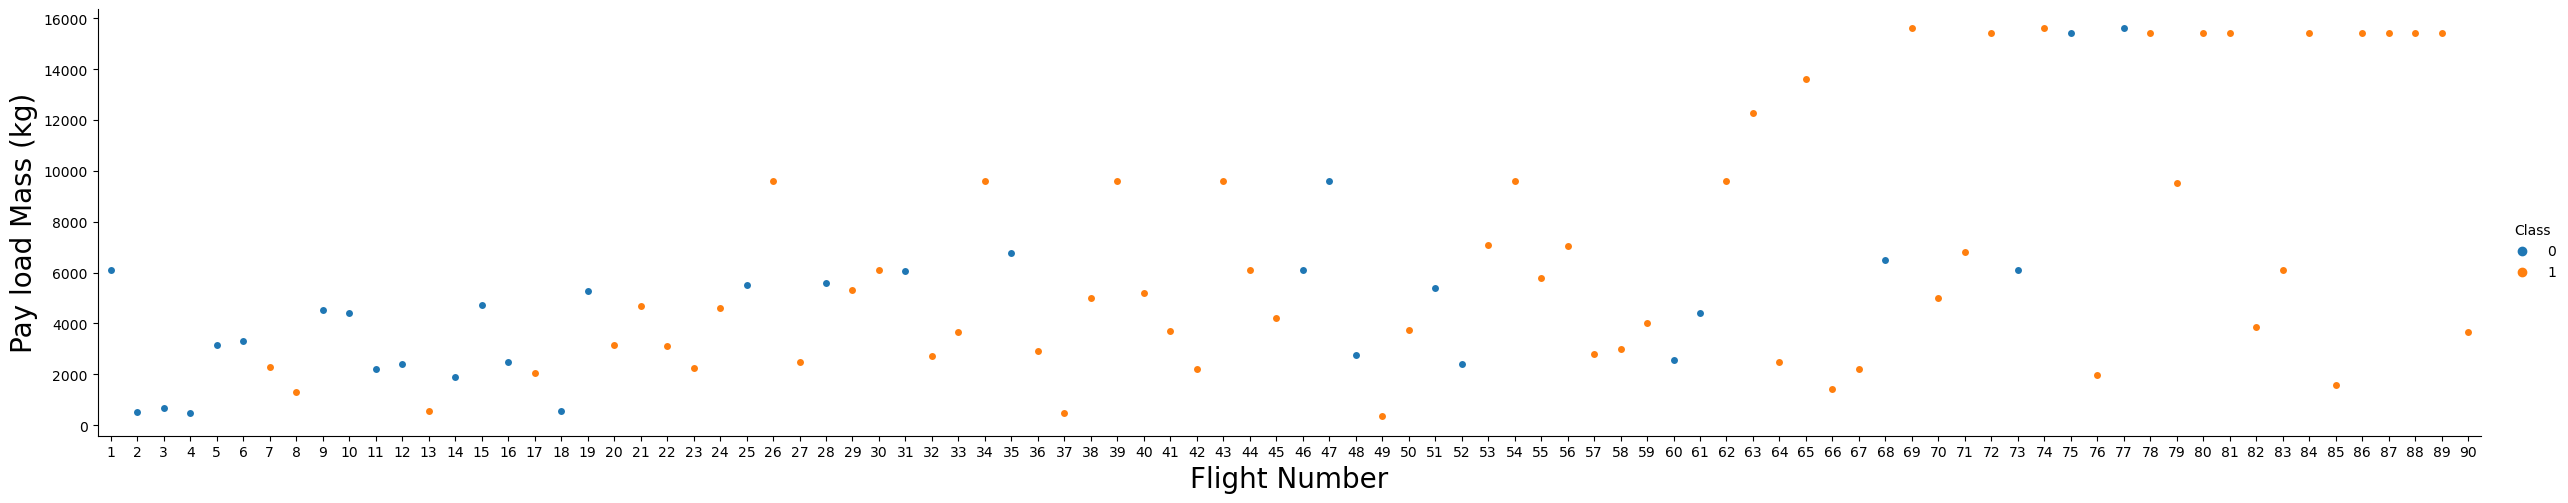

In [56]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


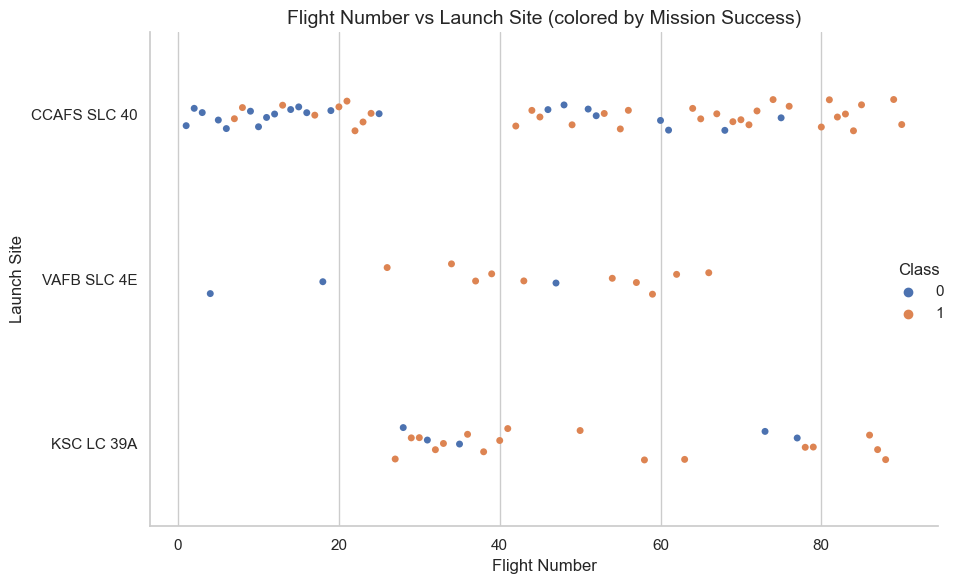

In [58]:
# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Erstelle das catplot
sns.catplot(
    data=df,
    x='FlightNumber',
    y='LaunchSite',
    hue='Class',          # Farbcodierung für Erfolgs-/Misserfolgsklasse
    kind='strip',         # Punkte je Kombination (alternativ: 'swarm' oder 'box')
    height=6,
    aspect=1.5
)

plt.title("Flight Number vs Launch Site (colored by Mission Success)", fontsize=14)
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


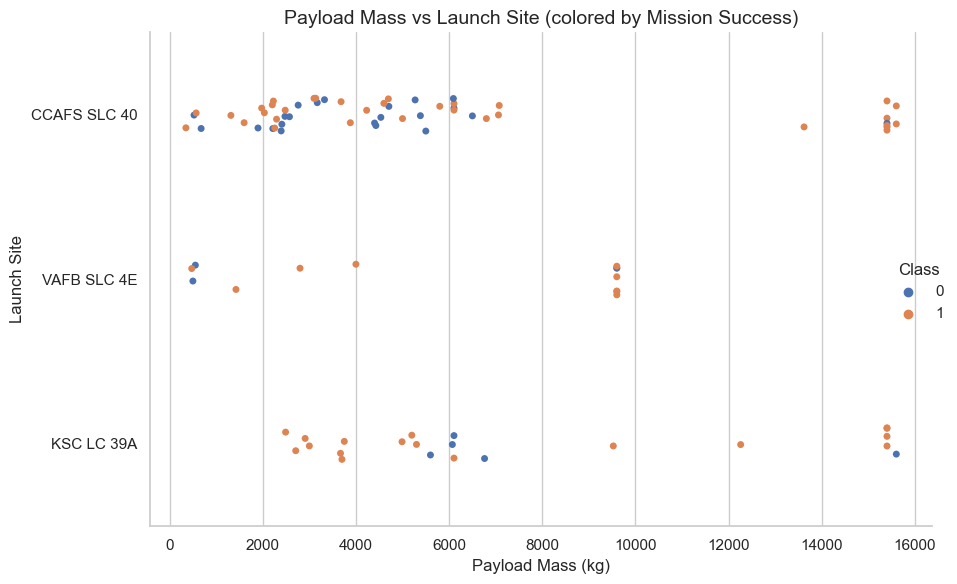

In [60]:
# Visualisiere Payload Mass je Launch Site, farbcodiert nach Erfolgsklasse
sns.catplot(
    data=df,
    x='PayloadMass',
    y='LaunchSite',
    hue='Class',         # Erfolg/Misserfolg
    kind='strip',        # Einzelne Punkte
    height=6,
    aspect=1.5
)

plt.title("Payload Mass vs Launch Site (colored by Mission Success)", fontsize=14)
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.tight_layout()
plt.show()

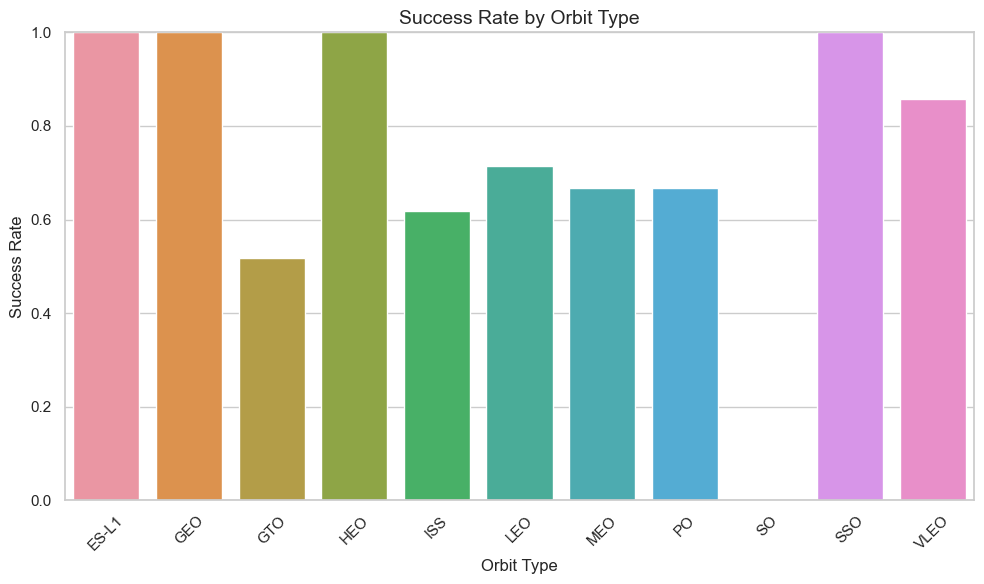

In [62]:
# Berechne Erfolgsrate pro Orbit-Typ
success_rate_per_orbit = df.groupby('Orbit')['Class'].mean().reset_index()
success_rate_per_orbit.rename(columns={'Class': 'Success_Rate'}, inplace=True)

# Visualisierung als Balkendiagramm
plt.figure(figsize=(10, 6))
sns.barplot(data=success_rate_per_orbit, x='Orbit', y='Success_Rate')

plt.title("Success Rate by Orbit Type", fontsize=14)
plt.ylabel("Success Rate")
plt.xlabel("Orbit Type")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


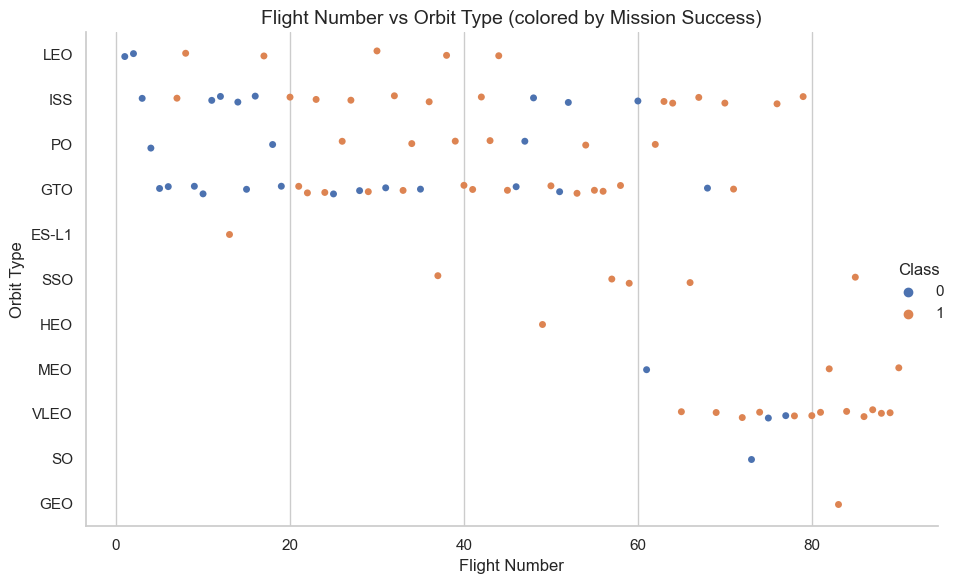

In [64]:
# Stripplot: Flight Number vs Orbit, farbcodiert nach Class
sns.catplot(
    data=df,
    x='FlightNumber',
    y='Orbit',
    hue='Class',
    kind='strip',
    height=6,
    aspect=1.5
)

plt.title("Flight Number vs Orbit Type (colored by Mission Success)", fontsize=14)
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


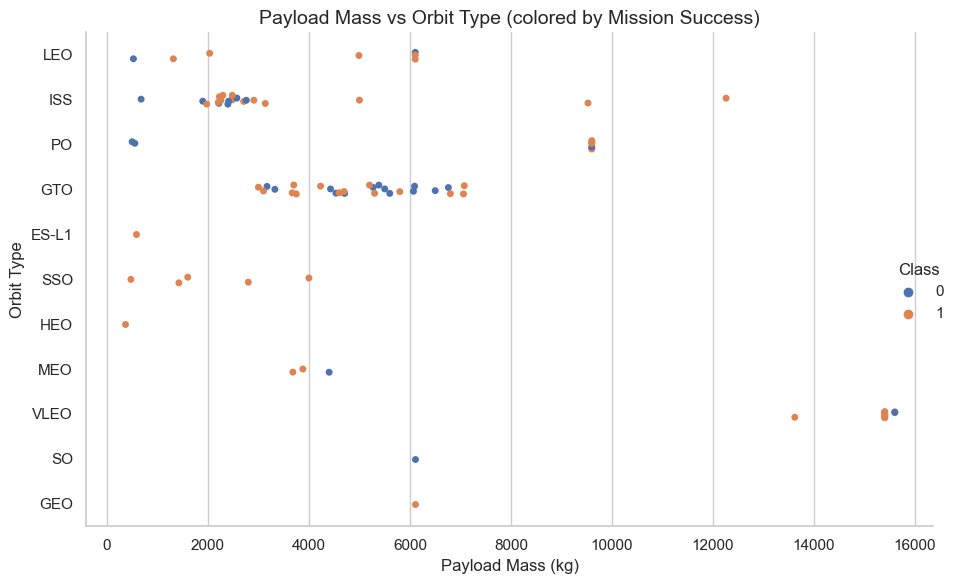

In [66]:
# Punktdiagramm: Payload vs Orbit, farbcodiert nach Class
sns.catplot(
    data=df,
    x='PayloadMass',
    y='Orbit',
    hue='Class',
    kind='strip',    # Punkte ohne Überlagerung (ggf. 'swarm' verwenden)
    height=6,
    aspect=1.5
)

plt.title("Payload Mass vs Orbit Type (colored by Mission Success)", fontsize=14)
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.tight_layout()
plt.show()

In [68]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [74]:
# Jahr extrahieren und in 'Year' speichern
df['Year'] = df['Date'].str.split('-').str[0]

In [76]:
# Erfolgsrate je Jahr berechnen
success_by_year = df.groupby('Year')['Class'].mean().reset_index()
success_by_year.rename(columns={'Class': 'Success_Rate'}, inplace=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


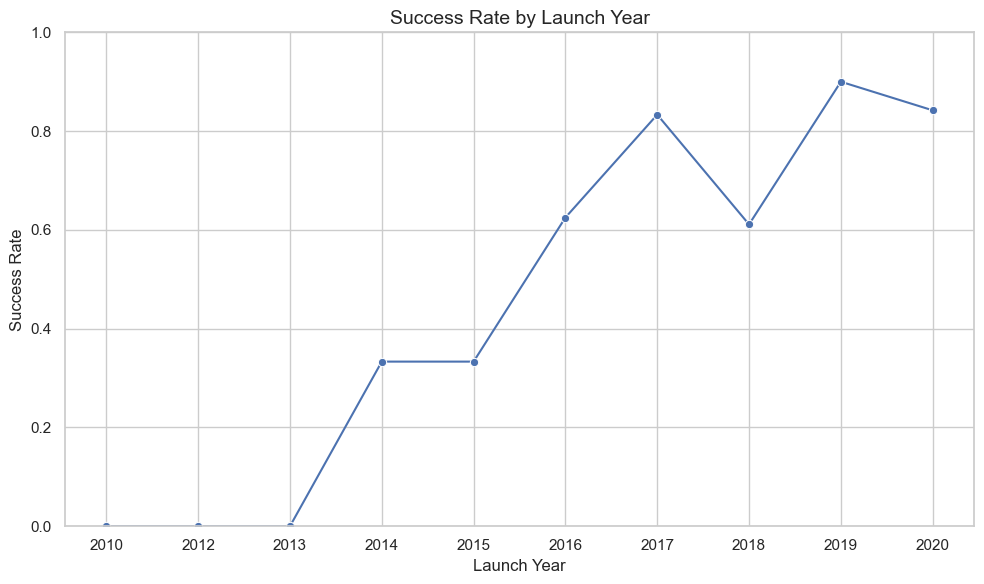

In [78]:
# Liniendiagramm: Erfolgsrate nach Jahr
plt.figure(figsize=(10, 6))
sns.lineplot(data=success_by_year, x='Year', y='Success_Rate', marker='o')

plt.title("Success Rate by Launch Year", fontsize=14)
plt.xlabel("Launch Year")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [82]:
# One-Hot-Encoding der genannten Spalten
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],
    prefix=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
)

# Ergebnisse anzeigen
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [84]:
# Umwandeln aller Spalten in float64
features_one_hot = features_one_hot.astype('float64')

# Prüfung: Ausgabe der Datentypen (optional)
features_one_hot.dtypes.head()

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
dtype: object

In [86]:
features_one_hot.shape[1]

80

#### INTERACTIVE DASHBOARDING

In [51]:
import folium
import pandas as pd

In [53]:
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

In [55]:
import pandas as pd

# Load the dataset directly from URL using pandas
spacex_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv")

In [57]:
# Select relevant columns
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]

# Get one entry per unique launch site
launch_sites_df = spacex_df.groupby('Launch Site', as_index=False).first()

# Keep only name and coordinates
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]

# Display the result
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [59]:
import folium

# Center map around the USA
map_center = [launch_sites_df['Lat'].mean(), launch_sites_df['Long'].mean()]
launch_map = folium.Map(location=map_center, zoom_start=5)

# Add a marker for each launch site
for _, row in launch_sites_df.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['Launch Site'],
        icon=folium.Icon(color='blue', icon='rocket', prefix='fa')
    ).add_to(launch_map)

# Show or save the map
launch_map  # For Jupyter
# launch_map.save("spacex_launch_sites_map.html")  # Uncomment to save as HTML

In [61]:
# Create map centered around the mean of coordinates
map_center = [launch_sites_df['Lat'].mean(), launch_sites_df['Long'].mean()]
launch_map = folium.Map(location=map_center, zoom_start=5)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(launch_map)

# Add a marker for each launch site
for _, row in launch_sites_df.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['Launch Site'],
        icon=folium.Icon(color='blue', icon='rocket', prefix='fa')
    ).add_to(marker_cluster)

# Display the map
launch_map  # In Jupyter
# launch_map.save("spacex_launch_sites_map.html")  # Optional save

In [63]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [65]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [67]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
circle = folium.Circle(
    location=nasa_coordinate,
    radius=1000,
    color='#d35400',
    fill=True
).add_child(folium.Popup('NASA Johnson Space Center'))

# Add NASA JSC text label using DivIcon
marker = folium.map.Marker(
    location=nasa_coordinate,
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 12px; color:#d35400;"><b>NASA JSC</b></div>'
    )
)

# Add both to the map
site_map.add_child(circle)
site_map.add_child(marker)

# Now add all launch sites with circles and popups
for _, row in launch_sites_df.iterrows():
    folium.Circle(
        location=[row['Lat'], row['Long']],
        radius=1000,
        color='blue',
        fill=True,
        fill_opacity=0.4
    ).add_child(folium.Popup(row['Launch Site'])).add_to(site_map)

# Display the map
site_map

In [69]:
# Task: Mark the success/failed launches for each site on the map

# Recreate the map centered around USA or NASA
map_center = [spacex_df['Lat'].mean(), spacex_df['Long'].mean()]
launch_result_map = folium.Map(location=map_center, zoom_start=5)

# Loop through each launch and mark success/failure
for _, row in spacex_df.iterrows():
    # Choose color based on success or failure
    color = 'green' if row['class'] == 1 else 'red'
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=f"{row['Launch Site']} - {'Success' if row['class'] == 1 else 'Failure'}",
        icon=folium.Icon(color=color)
    ).add_to(launch_result_map)

# Show the map
launch_result_map

In [71]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [73]:
marker_cluster = MarkerCluster()

In [75]:
from folium.plugins import MarkerCluster
import folium

# Step 1: Add marker_color column
spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: 'green' if x == 1 else 'red')

# Step 2: Create a folium map
map_center = [spacex_df['Lat'].mean(), spacex_df['Long'].mean()]
launch_result_map = folium.Map(location=map_center, zoom_start=5)

# Step 3: Create marker cluster
marker_cluster = MarkerCluster().add_to(launch_result_map)

# Step 4: Add markers to the map using the new column
for _, row in spacex_df.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=f"{row['Launch Site']} - {'Success' if row['class'] == 1 else 'Failure'}",
        icon=folium.Icon(color=row['marker_color'])
    ).add_to(marker_cluster)

# Step 5: Show the map
launch_result_map

In [77]:
import folium
from folium.plugins import MarkerCluster
from folium.features import DivIcon

# Step 1: Create the marker_color column (if not done already)
spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: 'green' if x == 1 else 'red')

# Step 2: Initialize site_map (centered at NASA JSC or US center)
site_map = folium.Map(location=[spacex_df['Lat'].mean(), spacex_df['Long'].mean()], zoom_start=5)

# Step 3: Create a MarkerCluster object and add to map
marker_cluster = MarkerCluster()
site_map.add_child(marker_cluster)

# Step 4: Loop through the DataFrame and add markers to the cluster
for index, record in spacex_df.iterrows():
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],
        popup=f"{record['Launch Site']} - {'Success' if record['class'] == 1 else 'Failure'}",
        icon=folium.Icon(color='white', icon_color=record['marker_color'], icon='rocket', prefix='fa')
    )
    marker_cluster.add_child(marker)

# Step 5: Display the map
site_map

In [85]:
# TASK 3: Calculate the distances between a launch site to its proximities
import folium
from folium.plugins import MousePosition

# Initialize the map (use your existing site_map or create a new one)
site_map = folium.Map(location=[spacex_df['Lat'].mean(), spacex_df['Long'].mean()], zoom_start=5)

# Formatter to display coordinates with 5 decimal places
formatter = "function(num) {return L.Util.formatNum(num, 5);};"

# Create MousePosition plugin
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

# Add MousePosition to map
site_map.add_child(mouse_position)

# Show map
site_map

In [87]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [89]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

coastline_lat = 28.56367
coastline_lon = -80.57163

# Get coordinates of CCAFS LC-40
launch_site = launch_sites_df[launch_sites_df['Launch Site'] == 'CCAFS LC-40'].iloc[0]
launch_lat = launch_site['Lat']
launch_lon = launch_site['Long']

# Use your existing function
distance_coastline = calculate_distance(launch_lat, launch_lon, coastline_lat, coastline_lon)

# Show result
print(f"Distance from {launch_site['Launch Site']} to coastline: {distance_coastline:.2f} km")

Distance from CCAFS LC-40 to coastline: 0.58 km


In [91]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
# for example
# distance_marker = folium.Marker(
#    coordinate,
#    icon=DivIcon(
#        icon_size=(20,20),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#        )
#    )

import folium
from folium.features import DivIcon

# Coordinates of launch site (e.g., CCAFS LC-40)
launch_lat = 28.562302
launch_lon = -80.577356

# Coordinates of manually selected closest coastline point (from MousePosition)
coastline_lat = 28.56367
coastline_lon = -80.57163

# Calculate distance using your previously defined function
distance = calculate_distance(launch_lat, launch_lon, coastline_lat, coastline_lon)

# Create map centered at the launch site
site_map = folium.Map(location=[launch_lat, launch_lon], zoom_start=14)

# Add marker for launch site
folium.Marker(
    [launch_lat, launch_lon],
    popup="CCAFS LC-40",
    icon=folium.Icon(color='blue')
).add_to(site_map)

# Add marker for coastline
folium.Marker(
    [coastline_lat, coastline_lon],
    popup="Closest Coastline",
    icon=folium.Icon(color='green')
).add_to(site_map)

# Add a line between them
folium.PolyLine(
    locations=[[launch_lat, launch_lon], [coastline_lat, coastline_lon]],
    color='purple'
).add_to(site_map)

# Add distance label marker on the coastline point
distance_marker = folium.Marker(
    location=[coastline_lat, coastline_lon],
    icon=DivIcon(
        icon_size=(100, 20),
        icon_anchor=(0, 0),
        html='<div style="font-size: 12px; color:#d35400;"><b>{:.2f} KM</b></div>'.format(distance),
    )
)
distance_marker.add_to(site_map)

# Show the map
site_map

In [95]:
import folium
from folium.features import DivIcon

# Step 1: Coordinates
launch_site = [28.562302, -80.577356]         # CCAFS LC-40
closest_city = [28.3852, -81.5639]            # Example: Orlando, FL

# Step 2: Calculate distance
distance_city = calculate_distance(launch_site[0], launch_site[1], closest_city[0], closest_city[1])

# Step 3: Create the map
site_map = folium.Map(location=launch_site, zoom_start=8)

# Step 4: Add launch site marker
folium.Marker(
    location=launch_site,
    popup="CCAFS LC-40",
    icon=folium.Icon(color='blue')
).add_to(site_map)

# Step 5: Add marker for closest city with distance label
folium.Marker(
    location=closest_city,
    icon=DivIcon(
        icon_size=(150, 36),
        icon_anchor=(0, 0),
        html='<div style="font-size: 12px; color:#d35400;"><b>{:.2f} KM to City</b></div>'.format(distance_city)
    )
).add_to(site_map)

# Step 6: Draw line between launch site and city
coordinates = [launch_site, closest_city]
line = folium.PolyLine(locations=coordinates, weight=1, color='gray')
site_map.add_child(line)

# Display map
site_map